In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [7]:
imPath = '../Images/cats.png'
img = cv2.imread(imPath);
grayImg = '../Images/albert-einstein_gray.jpg'
I_gray = cv2.imread(grayImg, cv2.IMREAD_GRAYSCALE)
fruit = '../Images/fruit-trees.jpg'
I_circles = cv2.imread(fruit, cv2.IMREAD_GRAYSCALE)
juggler = '../Images/juggling.png'
I_balls = cv2.imread(juggler)
I = cv2.cvtColor(I_balls, cv2.COLOR_RGB2GRAY)

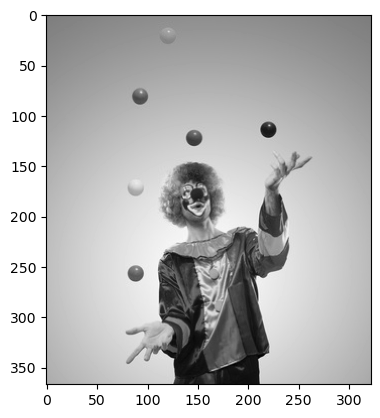

In [8]:
plt.imshow(I, cmap='gray')

In [9]:
numRows, numCols = I.shape[0], I.shape[1]

In [12]:
directions = {'left':(0,-1),
             'right':(0,1),
             'up':(-1,0),
             'down':(1,0),
             'up_left':(-1,-1),
             'up_right':(-1,1),
             'down_left':(1,-1),
             'down_right':(1,1)}

In [14]:
C = np.zeros(I.shape)
for i in range(2, numRows - 2):
    for j in range(2, numCols - 2):
        minSSD = -1
        for d in directions.values():
            u, v = d[0], d[1]
            P1 = I[i-1:i+2,j-1:j+2]
            P2 = I[i+u-1:i+u+2,j+v-1:j+v+2]
            ssd = np.sum((P1-P2)**2)
            if minSSD == -1:
                minSSD = ssd
            elif ssd < minSSD:
                minSSD = ssd
        C[i,j] = minSSD

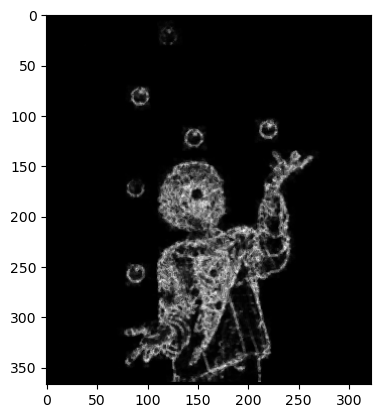

In [15]:
plt.imshow(C,cmap='gray')

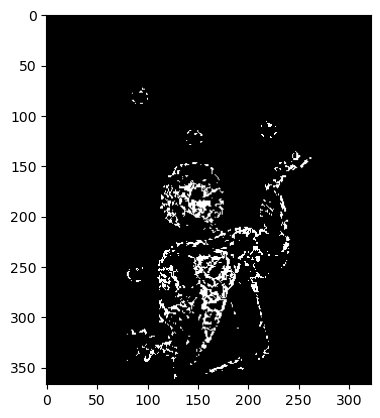

In [17]:
th = C.mean()+3*C.std()
C_img = C>th
plt.imshow(C_img,cmap='gray')

In [51]:
I2 = I_balls[:,:,::-1]
idx = np.argwhere(C_img)
r,c = idx[:,0],idx[:,1]
for i in range(len(r)):
    I2 = cv2.circle(np.float32(I2),(c[i],r[i]),radius=1,color=(0,0,255),thickness=-1)

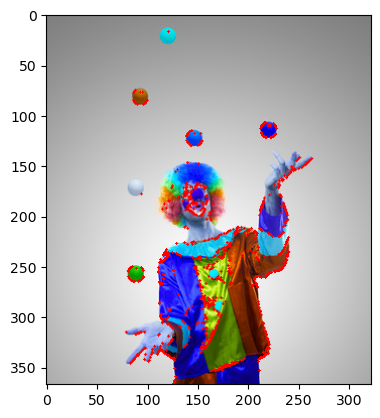

In [52]:
plt.imshow(np.array(I2[:,:,::-1],np.uint8))

# Harris Corner Detector

In [42]:
I = np.float64(I)
mask_x = np.array([[-1],[1]])
Ix = cv2.filter2D(I,-1,mask_x)
Iy = cv2.filter2D(I,-1,mask_x.T)
Ix2 = Ix*Ix
Iy2 = Iy*Iy
IxIy = Ix*Iy

In [45]:
K = np.ones((3,3))
sIx2 = cv2.filter2D(Ix2,-1,K)
sIy2 = cv2.filter2D(Iy2,-1,K)
sIxIy = cv2.filter2D(IxIy,-1,K)

In [48]:
L1 = ((sIx2 + sIy2)+((sIx2+sIy2)**2 - 4*((IxIy)**2))**.5)/2
L2 = ((sIx2 + sIy2)-((sIx2+sIy2)**2 - 4*((IxIy)**2))**.5)/2

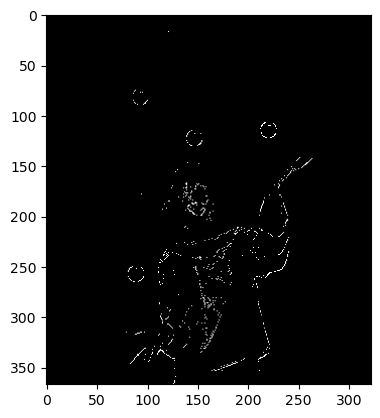

In [68]:
# Corner Detection
th = L2.mean()+3*L2.std()
C_img = L2>th
plt.imshow(C_img,cmap='gray')

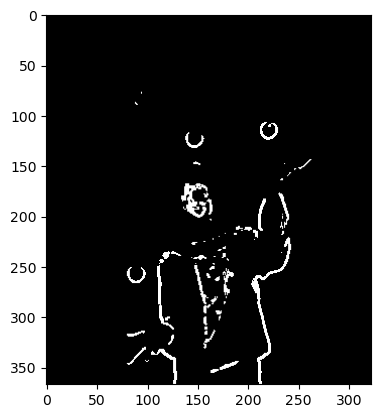

In [69]:
# Edge Detection
th = L1.mean()+3*L1.std()
C_img2 = L1>th
plt.imshow(C_img2,cmap='gray')

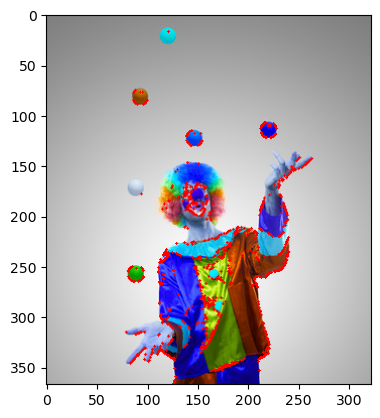

In [66]:
I2 = I_balls[:,:,::-1]
idx = np.argwhere(C_img)
r,c = idx[:,0],idx[:,1]
for i in range(len(r)):
    I2 = cv2.circle(np.float32(I2),(c[i],r[i]),radius=1,color=(0,0,255),thickness=-1)
plt.imshow(np.array(I2[:,:,::-1],np.uint8))

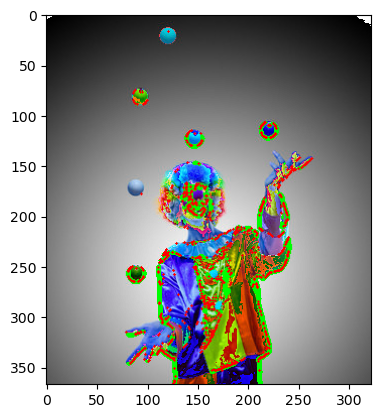

In [75]:
I2 = I_balls[:,:,::-1]
idx = np.argwhere(C_img2)
idx2 = np.argwhere(C_img)
r,c = idx[:,0],idx[:,1]
r2,c2 = idx2[:,0],idx2[:,1]
for i in range(len(r)):
    I2 = cv2.circle(np.float32(I2),(c[i],r[i]),radius=1,color=(0,255,0),thickness=-1)
    # I3 = cv2.circle(np.float32(I2),(c2[i],r2[i]),radius=1,color=(0,0,255),thickness=-3)
for i in range(len(r2)):
    I3 = cv2.circle(np.float32(I2),(c2[i],r2[i]),radius=1,color=(0,0,255),thickness=-1)
    # I3 = cv2.circle(np.float32(I2),(c2[i],r2[i]),radius=1,color=(0,0,255),thickness=-3)
I4 = I2 + I3
plt.imshow(np.array(I4[:,:,::-1],np.uint8))